In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("final_internship_data.csv")
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [83]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

<h1>Preprocessing</h1>

In [86]:
df.duplicated().sum()

0

In [88]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [90]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
120227,BOLML7gg,Carol Kim,John Scott,Very Good,rainy,Dense Traffic,2012-12-11 12:57:00.00000013,12.5,2012-12-11 12:57:00,-1.291417,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245696,AA838qgm,Mark Jones,Christy Taylor,Bad,windy,Dense Traffic,2013-03-21 18:07:07.0000001,86.5,2013-03-21 18:07:07,-1.291397,...,3,3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340533,BqrlHUr2,Joshua Mullins,Sarah Khan,Excellent,cloudy,Dense Traffic,2012-12-11 12:50:52.00000010,27.5,2012-12-11 12:50:52,-1.291188,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428108,rL4WTHGq,Richard Brown,Rachel Miller,Very Good,cloudy,Flow Traffic,2011-09-08 09:12:52.0000001,11.8,2011-09-08 09:12:52,-1.291317,...,9,3,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471472,tKIOKS8Y,Larry Wade,Howard Jackson,Good,windy,Congested Traffic,2012-12-11 12:34:20.0000006,7.8,2012-12-11 12:34:20,0.000000,...,12,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df.dropna(inplace=True)

In [94]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

<h1>EDA</h1>

<p>Numerical Columns</p>

In [139]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


<p1>Catagorical Columns</p1>

In [100]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [102]:
#Which driver has the most trips?
driver = df['Driver Name'].value_counts()

In [104]:
#Are most cars in good condition?
df['Car Condition'].value_counts()

Car Condition
Very Good    125310
Bad          124977
Good         124967
Excellent    124741
Name: count, dtype: int64

In [106]:
#What is the most common weather condition during trips?
df['Weather'].value_counts()

Weather
sunny     100433
cloudy    100060
rainy      99971
stormy     99955
windy      99576
Name: count, dtype: int64

In [108]:
#Which traffic condition occurs most frequently?
df['Traffic Condition'].value_counts()

Traffic Condition
Congested Traffic    166846
Dense Traffic        166581
Flow Traffic         166568
Name: count, dtype: int64

In [110]:
#Which year has the highest number of trips?
df['year'].value_counts()

year
2012    80222
2011    79528
2013    78033
2009    77002
2010    75791
2014    74608
2015    34811
Name: count, dtype: int64

In [112]:
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['weekday'] = df['weekday'].map(weekday_map)

In [114]:
#What is the most popular day for trips?
df['weekday'].value_counts()

weekday
Friday       77224
Saturday     76212
Thursday     74776
Wednesday    72230
Tuesday      69929
Sunday       65387
Monday       64237
Name: count, dtype: int64

In [116]:
#Which month has the highest number of trips?
df['month'].value_counts()

month
5     46733
3     46714
4     45959
6     44827
1     44547
2     42454
10    40551
12    38476
7     38127
9     37979
11    37757
8     35871
Name: count, dtype: int64

In [118]:
#What are the busiest hours for trips?
df['hour'].value_counts()

hour
19    31382
18    30063
20    29193
21    28639
22    27817
14    25385
23    24864
12    24649
17    24646
13    24404
15    24025
9     23565
11    23338
8     22599
10    22428
16    20569
0     19650
7     18231
1     14556
2     10884
6     10326
3      7936
4      5864
5      4982
Name: count, dtype: int64

In [120]:
#Which airport do most trips go to?
df[['jfk_dist', 'ewr_dist', 'lga_dist']].idxmin(axis=1).value_counts()

lga_dist    474724
jfk_dist     20438
ewr_dist      4833
Name: count, dtype: int64

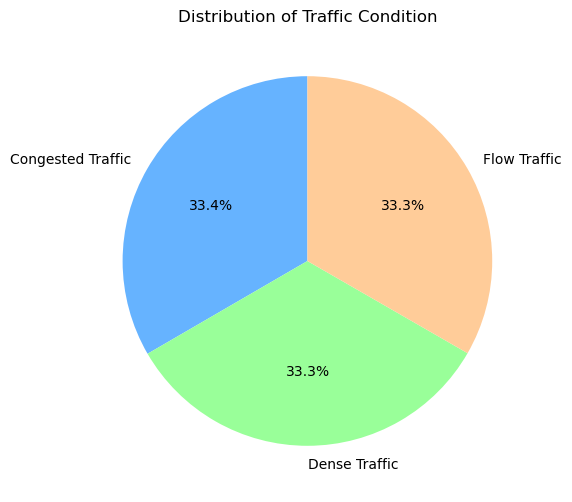

In [122]:
traffic_counts = df['Traffic Condition'].value_counts()

plt.figure(figsize=(6,6))
traffic_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')
plt.title('Distribution of Traffic Condition')
plt.show()

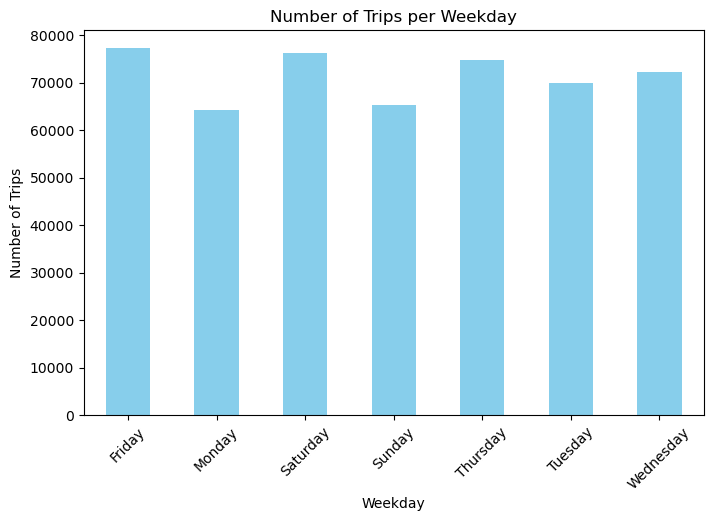

In [124]:
weekday_counts = df['weekday'].value_counts().sort_index()

plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Weekday')
plt.xticks(rotation=45)
plt.show()

<h1>Relation between features</h1>

                        mean   count
Traffic Condition                   
Congested Traffic  11.390549  166846
Dense Traffic      11.367565  166581
Flow Traffic       11.316378  166568


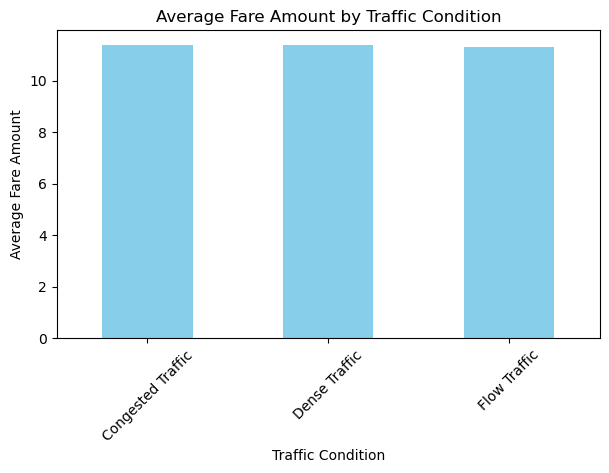

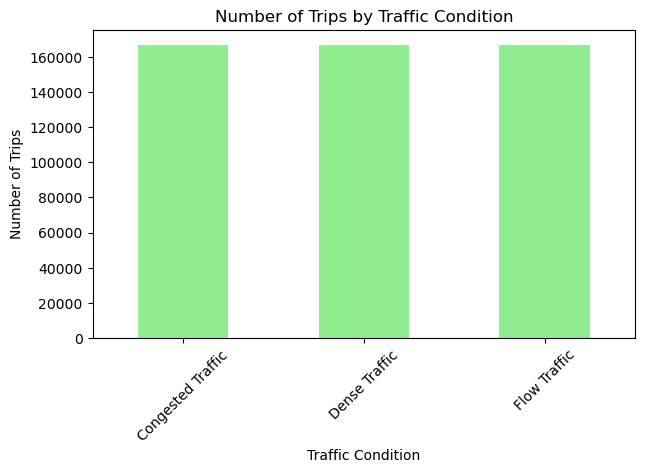

In [127]:
#What is the average fare amount and number of trips for each traffic condition?
agg_fare = df.groupby('Traffic Condition')['fare_amount'].agg(['mean', 'count'])

print(agg_fare)
# Plot for average fare amount
agg_fare['mean'].plot(kind='bar', color='skyblue', figsize=(7,4))
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Traffic Condition')
plt.xticks(rotation=45)
plt.show()

# Plot for number of trips
agg_fare['count'].plot(kind='bar', color='lightgreen', figsize=(7,4))
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Traffic Condition')
plt.xticks(rotation=45)
plt.show()


Car Condition
Bad          11.325572
Excellent    11.355010
Good         11.336281
Very Good    11.415705
Name: fare_amount, dtype: float64


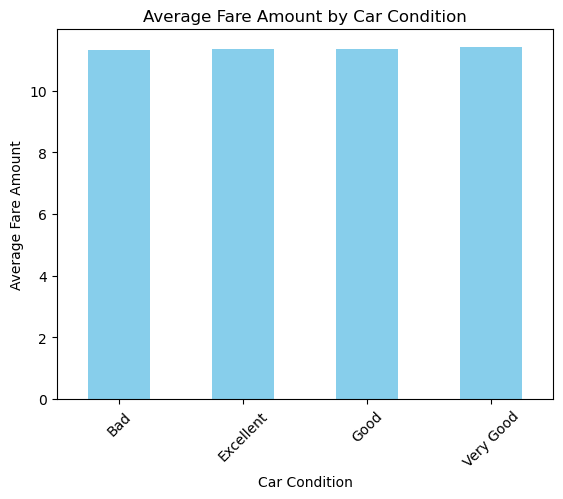

In [129]:
#Does the car condition affect the average fare amount?
fare_care = df.groupby('Car Condition')['fare_amount'].mean()

print(fare_care)
fare_care.plot(kind='bar', color='skyblue')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Car Condition')
plt.xticks(rotation=45)
plt.show()

In [131]:
#Is the average fare amount higher during specific hours of the day?
fare_hour = df.groupby('hour')['fare_amount'].mean()

print(fare_hour)

hour
0     11.774804
1     11.438250
2     11.511949
3     12.076379
4     13.687069
5     15.166068
6     12.314031
7     10.952701
8     10.913638
9     10.817963
10    10.904111
11    11.191079
12    11.128079
13    11.648150
14    11.869480
15    12.088543
16    11.837232
17    11.376808
18    10.977634
19    10.601758
20    10.825642
21    10.997743
22    11.319215
23    11.555971
Name: fare_amount, dtype: float64


year
2009    10.018505
2010    10.197785
2011    10.481482
2012    11.157532
2013    12.625632
2014    12.965165
2015    13.027985
Name: fare_amount, dtype: float64


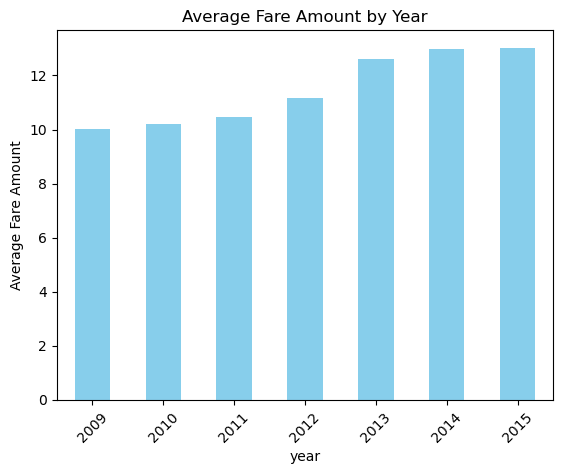

In [133]:
#How does the average fare amount vary across different years?
fare_year = df.groupby('year')['fare_amount'].mean()

print(fare_year)
fare_year.plot(kind='bar', color='skyblue')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Year')
plt.xticks(rotation=45)
plt.show()

weekday
Friday       11.396737
Monday       11.391663
Saturday     11.013806
Sunday       11.677655
Thursday     11.539883
Tuesday      11.209425
Wednesday    11.317253
Name: fare_amount, dtype: float64


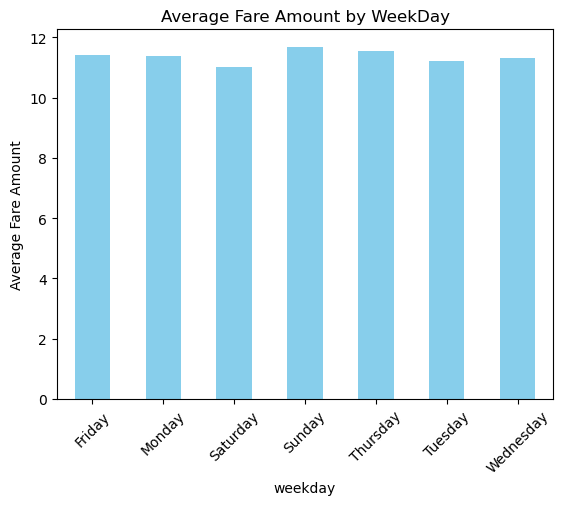

In [135]:
#Does the average fare amount vary by weekday?
fare_day = df.groupby('weekday')['fare_amount'].mean()

print(fare_day)
fare_day.plot(kind='bar', color='skyblue')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by WeekDay')
plt.xticks(rotation=45)
plt.show()